In [1]:
%matplotlib inline
from pandas import *
from pylab import *
import numpy

(17, 17)


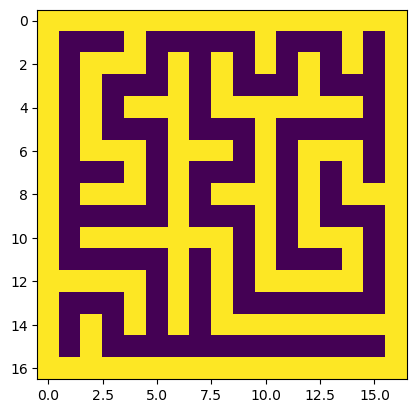

In [2]:
def make_maze(w = 16, h = 8):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(numpy.random.randint(w), numpy.random.randint(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M
 
maze=numpy.array(make_maze(8,8))
imshow(maze)
#ylim(-0.5,16.5)
print(maze.shape)

In [3]:
print(maze)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1]
 [1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1]
 [1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1]
 [1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1]
 [1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1]
 [1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1]
 [1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1]
 [1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


[0.22 0.26 0.26 0.26]
1565.0 1565


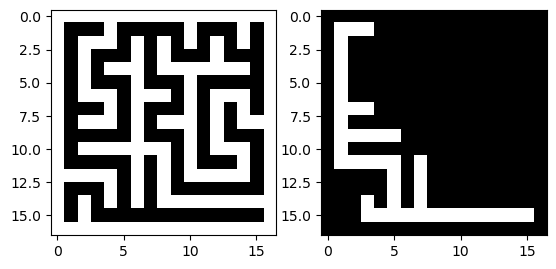

In [4]:
visited=numpy.zeros((17,17))
policy=numpy.array([0.22,0.26,0.26,0.26])
print(policy)
x=1
y=1
xm=[0,1,0,-1]
ym=[1,0,-1,0]
trackX=[x]
trackY=[y]
visited[x][y]=1
while x!=15 or y!=15:
    direction=numpy.random.choice([0,1,2,3],p=policy)
    tx=x+xm[direction]
    ty=y+ym[direction]
    if maze[tx][ty]==0:
        x=tx
        y=ty
        visited[x][y]+=1
        trackX.append(x)
        trackY.append(y)
        
subplot(1,2,1)
imshow(maze,cmap='gray')
subplot(1,2,2)
imshow(visited,cmap='gray',vmax=1)
print(visited.sum(),len(trackX))

In [5]:
policy=numpy.ones((17,17,4))/4.0
print(policy.shape)
print(policy[1][1])
print(policy[1][3])
policy[1][1]=numpy.array([0.0,0.0,1.0,0.0])
policy[1][3]=numpy.array([0.0,1.0,0.0,0.0])
print(policy[1][1])
print(policy[1][3])

(17, 17, 4)
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0. 0. 1. 0.]
[0. 1. 0. 0.]


891.0 891


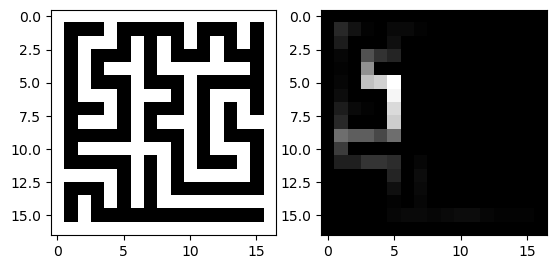

In [6]:
visited=numpy.zeros((17,17))
policy=numpy.ones((17,17,4))/4.0
learningRate=0.01
x=1
y=1
xm=[0,1,0,-1]
ym=[1,0,-1,0]
trackX=[x]
trackY=[y]
actions=[]
visited[x][y]=1
while x!=15 or y!=15:
    direction=numpy.random.choice([0,1,2,3],p=policy[x][y])
    tx=x+xm[direction]
    ty=y+ym[direction]
    if maze[tx][ty]==0:
        x=tx
        y=ty
        visited[x][y]+=1
        trackX.append(x)
        trackY.append(y)
        actions.append(direction)
        
for i in range(len(actions)):
    policy[trackX[i]][trackY[i]][actions[i]]+=learningRate
for i in range(17):
    for j in range(17):
        policy[i][j]/=policy[i][j].sum()
        
subplot(1,2,1)
imshow(maze,cmap='gray')
subplot(1,2,2)
imshow(visited,cmap='gray')
print(visited.sum(),len(trackX))

In [29]:
policy=numpy.ones((17,17,4))/4.0
#policy=numpy.random.random((17,17,4))
for i in range(17):
    for j in range(17):
        policy[i][j] /= policy[i][j].sum()

learningRate=0.01

L=[]
for i in range(200):
    visited=numpy.zeros((17,17))
    x=1
    y=1
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    trackX=[x]
    trackY=[y]
    actions=[]
    visited[x][y] = 1
    while x != 15 or y != 15:
        direction=numpy.random.choice([0,1,2,3],p=policy[x][y])
        tx=x+xm[direction]
        ty=y+ym[direction]
        if maze[tx][ty] == 0:
            x=tx
            y=ty
            visited[x][y] += 1
            trackX.append(x)
            trackY.append(y)
            actions.append(direction)
        

    for i in range(len(actions)):
        policy[trackX[i]][trackY[i]][actions[i]] += learningRate

    # Set the probabilities of actions that lead to walls to zero
    """ for i in range(17):
        for j in range(17):
            if maze[i][j] == 1:
                policy[i][j][0] = 0
                policy[i][j][1] = 0
                policy[i][j][2] = 0
                policy[i][j][3] = 0 """

    # Normalize the policy
    for i in range(17):
        for j in range(17):
            if policy[i][j].sum() != 0:
                policy[i][j] /= policy[i][j].sum()

    L.append(len(actions))
    
#plot(L)

[0.25 0.25 0.25 0.25]
[5.99979872e-01 4.00020128e-01 2.25658167e-11 2.25658167e-11]
[1.79088667e-06 1.79088667e-06 9.99994627e-01 1.79088667e-06]
Actions: 1310


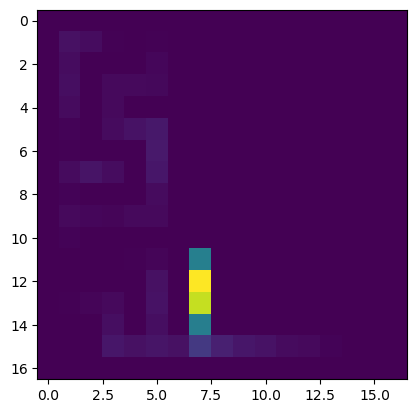

In [30]:
# Test policy for wall
print((policy[0][0]))

# Test policy for path
print((policy[1][1]))
print((policy[1][3]))

print("Actions:",len(actions))
imshow(visited)

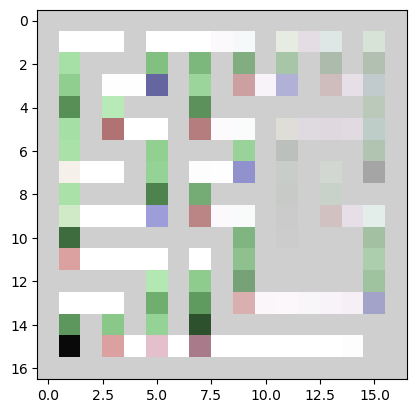

In [31]:
imshow(policy)